In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [4]:
from ShAReD_Net.configure import config

cam_transform = config.dataset.cam_transform
inverse_cam_transforme = config.dataset.inverse_cam_transforme



In [5]:
#TODO TEST
print(tf.matmul(cam_transform, inverse_cam_transforme))

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [6]:
data_split = "train"

In [7]:
import ShAReD_Net.data.transform.transform as transform
print(transform.cut_delta)

2


In [8]:
img_poses_ds = config.dataset.create_dataset(data_split)

img_poses_poss_ds = transform.create_img_poses_poss_dataset(img_poses_ds)
imgcut_poses_poss_ds = transform.create_imgcut_poses_poss_dataset(img_poses_poss_ds, transform.cam_intr_f)
imgcut_imgposes_imgposs_ds = transform.create_imgcut_imgposes_imgposs_dataset(imgcut_poses_poss_ds, cam_transform)
imgcut_cutposes_cutposs_ds = transform.create_imgcut_cutposes_cutposs_dataset(imgcut_imgposes_imgposs_ds, transform.cam_intr_f)
imgcut_cutposes_cutposs_heatmap_ds = transform.create_imgcut_cutposes_cutposs_heatmap_dataset(imgcut_cutposes_cutposs_ds)
imgcut_cutposes_cutposs_heatmap_weights_ds = transform.create_imgcut_cutposes_cutposs_heatmap_weights_dataset(imgcut_cutposes_cutposs_heatmap_ds)
imgcut_cutposes_cutposs_heatmap_weights_relposes_ds = transform.create_imgcut_cutposes_cutposs_heatmap_weights_relposes_dataset(imgcut_cutposes_cutposs_heatmap_weights_ds)
imgcut_cutposes_cutposs_heatmap_weights_relposes_roiposes_ds = transform.create_imgcut_cutposes_cutposs_heatmap_weights_relposes_roiposes_dataset(imgcut_cutposes_cutposs_heatmap_weights_relposes_ds)


original poss, poses [[2.57066655 0.03933331 9.66266727]
 [1.28066659 0.101333335 8.58]
 [4.44133282 0.30733335 8.36]] [[[2.56 -0.62 9.62]
  [2.56 -0.52 9.66]
  [2.56 0.03 9.7]
  ...
  [2.65 0.5 9.81]
  [2.5 0.87 9.44]
  [2.62 0.88 9.96]]

 [[1.27 -0.53 8.55]
  [1.27 -0.41 8.57]
  [1.27 0.07 8.57]
  ...
  [1.38 0.58 8.65]
  [1.28 0.93 8.42]
  [1.31 0.78 8.99]]

 [[4.55 -0.25 8.36]
  [4.59 -0.15 8.36]
  [4.59 0.37 8.35]
  ...
  [4.18 0.5 8.15]
  [4.26 0.91 8.54]
  [4.14 0.91 8.19]]]
image poss, poses [[1268.07556 544.713806 9.66266727]
 [1132.84521 553.676514 8.58]
 [1575.19897 582.570862 8.36]] [[[1268.15796 465.367981 9.62]
  [1266.88196 477.664581 9.66]
  [1265.61658 543.581482 9.7]
  ...
  [1272.81348 599.021423 9.81]
  [1266.67371 646.722412 9.44]
  [1264.61438 642.313232 9.96]]

 [[1132.00696 468.217529 8.55]
  [1131.60559 484.599792 8.57]
  [1131.60559 549.458557 8.57]
  ...
  [1144.74451 617.646301 8.65]
  [1136.03809 667.902588 8.42]
  [1128.74072 640.471619 8.99]]

 [[1590.251

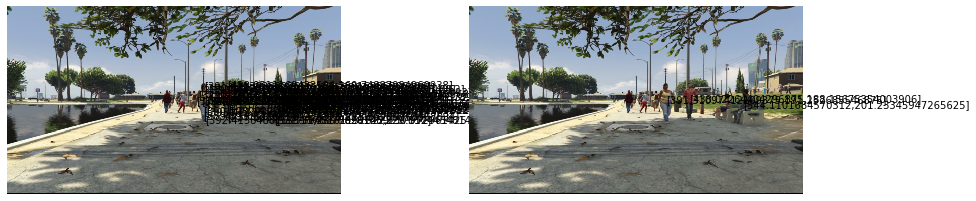

In [9]:
#TODO TEST CODE
#TEST
imgcut_cutposes_cutposs_ds_take = imgcut_cutposes_cutposs_ds.take(1)
img, poses_img, poss_img = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_ds_take)

def show_img_cut(image, poss, poses):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pose in poses:
        for joint in pose:
            text = f"[{joint[0]},{joint[1]}]"
            print(text)
            plt.text(joint[0],joint[1], text)
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(image)
    for pos in poss:
        text = f"[{pos[0]},{pos[1]}]"
        print(text)
        plt.text(pos[0],pos[1], text)
    plt.axis('off')

show_img_cut(img, poss_img, poses_img)

original poss, poses [] []
image poss, poses [] []
cut poss, poses [] []
tf.Tensor([373 663   3], shape=(3,), dtype=int32) tf.Tensor([0 3], shape=(2,), dtype=int32) tf.Tensor([ 0 15  3], shape=(3,), dtype=int32)
original poss, poses [[1.57666671 2.20466638 9.75]] [[[1.59 1.63 9.49]
  [1.57 1.73 9.56]
  [1.55 2.16 9.77]
  ...
  [1.74 2.64 9.76]
  [1.46 2.89 10.27]
  [1.77 3.04 9.8]]]
image poss, poses [[1147.25952 801.846558 9.75]] [[[1154.01685 738.897827 9.49]
  [1150.17358 749.554382 9.56]
  [1143.71533 796.016357 9.77]
  ...
  [1166.44678 853.229431 9.76]
  [1124.62317 865.863647 10.27]
  [1169.14893 899.21637 9.8]]]
cut poss, poses [[396.29 276.976349 9.75]] [[[398.624146 255.232407 9.49]
  [397.29657 258.913422 9.56]
  [395.065735 274.962463 9.77]
  ...
  [402.917725 294.725189 9.76]
  [388.470886 299.089355 10.27]
  [403.851105 310.610168 9.8]]]
tf.Tensor([373 663   3], shape=(3,), dtype=int32) tf.Tensor([1 3], shape=(2,), dtype=int32) tf.Tensor([ 1 15  3], shape=(3,), dtype=int3

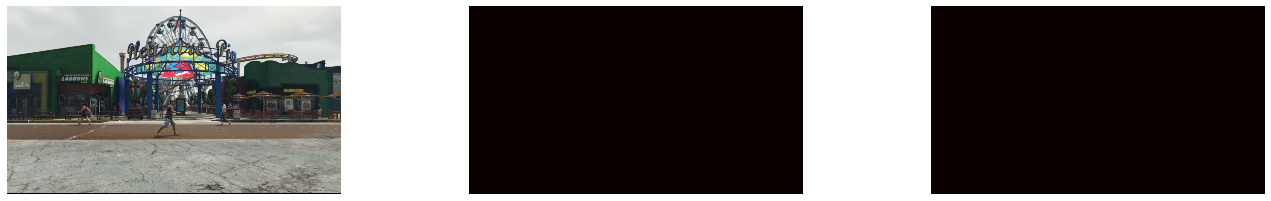

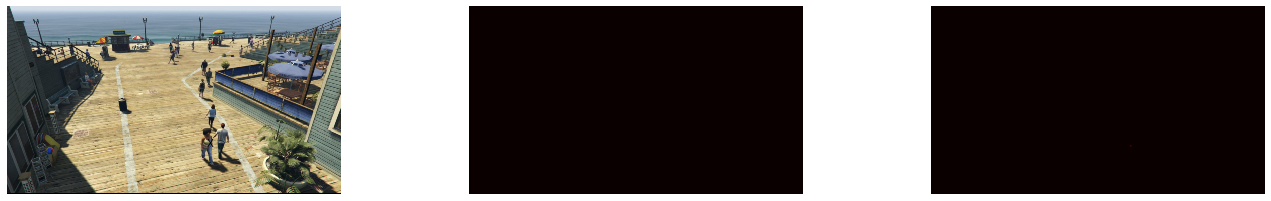

In [10]:
#TODO TEST CODE
#TEST

def show_img_and_hm(image, heatmap):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(40,20))

    ax = plt.subplot(5,5,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.axis('off')

    ax = plt.subplot(5,5,2)
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic")
    plt.axis('off')

    ax = plt.subplot(5,5,3)
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic")
    plt.axis('off')

for i in range(2):
    imgcut_cutposes_cutposs_heatmap_ds_take = imgcut_cutposes_cutposs_heatmap_ds.take(1)
    img, poses, poss, heatmap = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_ds_take)
    show_img_and_hm(img, heatmap)

original poss, poses [] []
image poss, poses [] []
cut poss, poses [] []
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
tf.Tensor([373 663   3], shape=(3,), dtype=int32) tf.Tensor([0 3], shape=(2,), dtype=int32) tf.Tensor([ 0 15  3], shape=(3,), dtype=int32)


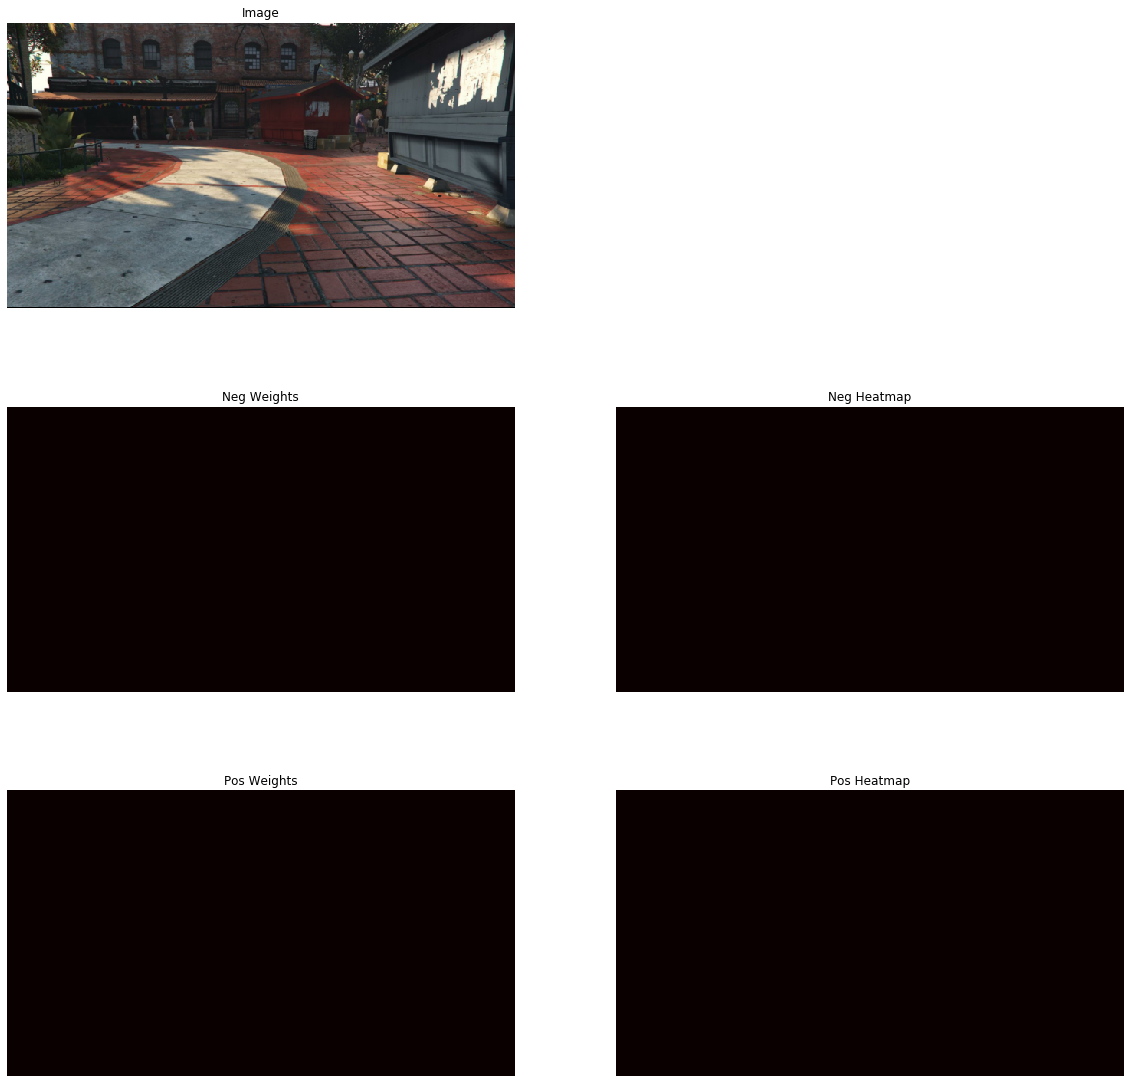

In [11]:
#TODO TEST CODE
#TEST

def show_img_and_hm_w(image, heatmap, weights):
    print(tf.shape(image),tf.shape(poss),tf.shape(poses))

    plt.figure(figsize=(20,20))

    ax = plt.subplot(3,2,1)
    plt.imshow(image)
    for pos in poss:
        plt.text(pos[0],pos[1], "X")
    plt.title('Image')
    plt.axis('off')

    ax = plt.subplot(3,2,3)
    plt.imshow(weights[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.title('Neg Weights')
    plt.axis('off')

    ax = plt.subplot(3,2,4)
    plt.title('Neg Heatmap')
    plt.imshow(heatmap[:,:,0], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,5)
    plt.title('Pos Weights')
    plt.imshow(weights[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

    ax = plt.subplot(3,2,6)
    plt.title('Pos Heatmap')
    plt.imshow(heatmap[:,:,1], cmap="hot", interpolation="bicubic", clim=(0.0, 1.0))
    plt.axis('off')

imgcut_cutposes_cutposs_heatmap_weights_ds_take = imgcut_cutposes_cutposs_heatmap_weights_ds.take(1)
img, poses, poss, heatmap, weights = tf.data.experimental.get_single_element(imgcut_cutposes_cutposs_heatmap_weights_ds_take)
show_img_and_hm_w(img, heatmap, weights)

In [12]:
import ShAReD_Net.data.transform.inverse_transform as inverse_transform

uncut_ds = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)

In [13]:
#TODO TEST test if uncut_ds == cam_ds
take_uncut = uncut_ds.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_uncut)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)


original poss, poses [[-2.24599981 0.178666666 6.00333357]
 [-1.0999999 0.114 6.23066664]] [[[-2.26 -0.43 5.84]
  [-2.24 -0.33 5.9]
  [-2.25 0.14 6.01]
  ...
  [-2.29 0.63 5.86]
  [-2.14 0.91 6.46]
  [-2.34 1.02 5.87]]

 [[-1.1 -0.51 6.07]
  [-1.09 -0.4 6.11]
  [-1.13 0.07 6.23]
  ...
  [-1.06 0.58 6.21]
  [-1.12 0.93 6.38]
  [-0.94 0.78 6.54]]]
image poss, poses [[526.762756 574.463501 6.00333357]
 [755.559631 561.187439 6.23066664]] [[[511.869904 454.736328 5.84]
  [520.352539 475.230469 5.9]
  [526.472534 566.975037 6.01]
  ...
  [507.470978 664.494873 5.86]
  [576.390076 703.123779 6.46]
  [498.378174 741.219788 5.87]]

 [[750.148315 442.705078 6.07]
  [753.417297 464.18988 6.11]
  [749.961426 553.01123 6.23]
  ...
  [762.338196 648.154541 6.21]
  [756.714783 708.799377 6.38]
  [793.559631 678.110046 6.54]]]
cut poss, poses [[181.956055 198.433 6.00333357]
 [260.987762 193.847122 6.23066664]] [[[176.811722 157.076447 5.84]
  [179.741806 164.155609 5.9]
  [181.855804 195.846298 6.01

In [16]:
real_ds1 = inverse_transform.create_uncut_dataset(imgcut_cutposes_cutposs_ds)
real_ds2 = inverse_transform.create_uncut_dataset(uncut_ds)

In [17]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds1.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

original poss, poses [] []
image poss, poses [] []
cut poss, poses [] []
uncut poss, poses [] []


In [18]:
#TODO TEST test if uncut_ds == cam_ds
take_real = real_ds2.take(1)
img, poss, poses = tf.data.experimental.get_single_element(take_real)

# image poss, poses and uncut poss, poses should have matching entrys (some are filtered out)

original poss, poses [[2.8233335 -1.01466668 6.74133348]
 [-1.56999993 -2.98199964 9.60000134]] [[[2.82 -1.52 6.33]
  [2.84 -1.47 6.43]
  [2.83 -1.02 6.75]
  ...
  [2.93 -0.66 7.07]
  [2.68 -0.37 7.22]
  [2.94 -0.38 7.37]]

 [[-1.61 -3.55 9.24]
  [-1.59 -3.44 9.27]
  [-1.57 -3 9.59]
  ...
  [-1.64 -2.64 9.9]
  [-1.43 -2.3 9.92]
  [-1.59 -2.28 10.08]]]
image poss, poses [[1444.98132 365.704498 6.74133348]
 [770.618713 180.296326 9.60000134]] [[[1475.88623 261.933624 6.33]
  [1471.46497 275.262817 6.43]
  [1445.5022 365.013306 6.75]
  ...
  [1439.90674 431.898163 7.07]
  [1389.83936 480.656494 7.22]
  [1421.94299 480.293091 7.37]]

 [[758.227234 95.0974274 9.24]
  [761.378601 110.278343 9.27]
  [770.421265 177.747665 9.59]
  ...
  [768.169739 231.2 9.9]
  [793.070557 271.512085 9.92]
  [777.339233 278.071442 10.08]]]
cut poss, poses [[499.129974 126.322792 6.74133348]
 [266.189545 62.2785225 9.60000134]] [[[509.805267 90.4779358 6.33]
  [508.278076 95.0821457 6.43]
  [499.309906 126.0840